# 필수 라이브러리 설치

In [ ]:
import random
import numpy as np

# Grid World

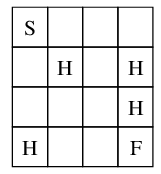

In [ ]:
# model 설정
# 4x4, state는 (x, y), H:hole, G:goal
# reward: goal:1 이며 나머지는 0
#
#     0  1  2  3
#     4  H  6  H
#     8  9 10  H
#     H 12 13  G
#
class GridWorld():
    def __init__(self):
        self.x = 0
        self.y = 0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a == 0:
            self.move_left()
        elif a == 1:
            self.move_down()
        elif a == 2:
            self.move_right()
        elif a == 3:
            self.move_up()

        if self.x == 3 and self.y == 3:
            reward = 1
        else:
            reward = 0

        done = self.is_done()
        return (self.x, self.y), reward, done

    # 움직임 정의
    def move_down(self):
        self.y += 1
        if self.y > 3:
            self.y = 3

    def move_up(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0

    def move_left(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0

    def move_right(self):
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self):
        if self.x == 3 and self.y == 3:
            return True
        elif self.x == 0 and self.y == 3:
            return True
        elif self.x == 1 and self.y == 1:
            return True
        elif self.x == 3 and self.y == 1:
            return True
        elif self.x == 3 and self.y == 2:
            return True
        else:
            return False

    def get_state(self):
        return (self.x, self.y)

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

# Agent

In [ ]:
class QAgent():
    def __init__(self):
        self.q_table = np.zeros((4, 4, 4))  # q벨류를 저장하는 변수. 모두 0으로 초기화.
        self.eps = 0.8
        self.alpha = 0.01
        self.ran = np.zeros((1,2))
        self.rand2 = np.zeros((1,4))

    def print_rands(self):
        print(self.ran)
        print(self.rand2)

    def select_action(self, s):
        # eps-greedy로 액션을 선택
        x, y = s
        coin = random.random()
        if coin < self.eps:
            action = random.randint(0, 3)
            self.ran[0,0] = self.ran[0,0] + 1
            self.rand2[0,action] = self.rand2[0,action] + 1
        else:
            action_val = self.q_table[y, x, :]
            action = np.argmax(action_val)
            self.ran[0, 1] = self.ran[0, 1] + 1
        return action

    def update_table_mc(self, history):
        # 한 에피소드에 해당하는 history를 입력으로 받아 q 테이블의 값을 업데이트 한다
        cum_reward = 0
        for transition in history[::-1]:
            # print(transition)
            s, a, r, s_prime = transition
            x, y = s

            cum_reward = cum_reward + r

            # 몬테 카를로 방식을 이용하여 업데이트.
            self.q_table[y, x, a] = self.q_table[y, x, a] + self.alpha * (cum_reward - self.q_table[y, x, a])


    def update_table_sarsa(self, transition):
        s, a, r, s_prime = transition
        x, y = s
        next_x, next_y = s_prime
        a_prime = self.select_action(s_prime)  # S'에서 선택할 액션 (실제로 취한 액션이 아님)
        self.q_table[y, x, a] = self.q_table[y, x, a] + 0.1 * (
                    r + self.q_table[next_y, next_x, a_prime] - self.q_table[y, x, a])

    def update_table_qlearning(self, transition):
        s, a, r, s_prime = transition
        x, y = s
        next_x, next_y = s_prime
        a_prime = self.select_action(s_prime)  # S'에서 선택할 액션 (실제로 취한 액션이 아님)
        self.q_table[y, x, a] = self.q_table[y, x, a] + 0.1 * (
                    r + np.amax(self.q_table[next_y, next_x, :]) - self.q_table[y, x, a])



    def anneal_eps(self):
        self.eps -= 0.001
        self.eps = max(self.eps, 0.1)

    def show_table(self):
        # 학습이 각 위치에서 어느 액션의 q 값이 가장 높았는지 보여주는 함수
        q_lst = self.q_table.tolist()
        data = np.zeros((4, 4))
        for row_idx in range(len(q_lst)):
            row = q_lst[row_idx]
            for col_idx in range(len(row)):
                col = row[col_idx]
                action = np.argmax(col)
                data[row_idx, col_idx] = action
        print(data)

    def show_table2(self):
        # 학습이 각 위치에서 어느 액션의 q 값이 가장 높았는지 보여주는 함수
        max_idx = np.argmax(self.q_table, axis=2)
        print(max_idx)
        for r in range(4):
            for c in range(4):
                # print('%d %d'%(r,c))
                # print(self.q_table[r,c,:])
                if c == 3 and r == 3:
                    str = 'G'
                elif c == 0 and r == 3:
                    str = 'X'
                elif c == 1 and r == 1:
                    str = 'X'
                elif c == 3 and r == 1:
                    str = 'X'
                elif c == 3 and r == 2:
                    str = 'X'
                else:
                    if max_idx[r][c] == 0:
                        str = '<'
                    elif max_idx[r][c] == 1:
                        str = 'v'
                    elif max_idx[r][c] == 2:
                        str = '>'
                    elif max_idx[r][c] == 3:
                        str = '^'
                print('%03s  '%str, end='')
            print('')

# Monte Carlo

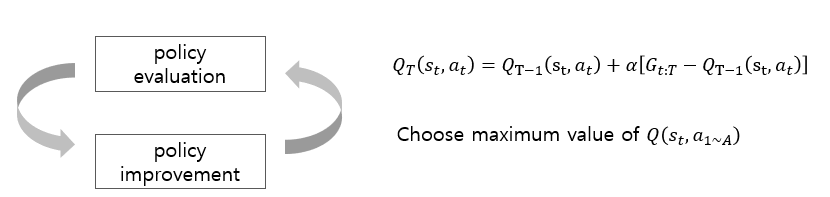

In [ ]:
def mc():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(10000):  # 총 1,000 에피소드 동안 학습
        done = False
        history = []

        s = env.reset()

        while not done:  # 한 에피소드가 끝날 때 까지
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            history.append((s, a, r, s_prime))
            s = s_prime

        agent.update_table_mc(history)  # 히스토리를 이용하여 에이전트를 업데이트
        agent.anneal_eps()

    agent.print_rands()
    agent.show_table()  # 학습이 끝난 결과를 출력
    agent.show_table2()  # 학습이 끝난 결과를 출력

# SARSA

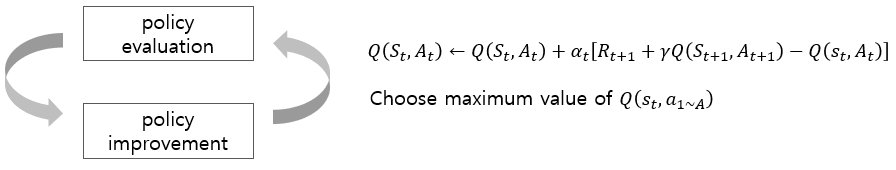

In [ ]:
def sarsa():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(10000):  # 총 1,000 에피소드 동안 학습
        done = False
        history = []

        s = env.reset()

        while not done:  # 한 에피소드가 끝날 때 까지
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            agent.update_table_sarsa((s,a,r,s_prime))  # 히스토리를 이용하여 에이전트를 업데이트
            s = s_prime
        agent.anneal_eps()

    agent.print_rands()
    agent.show_table()  # 학습이 끝난 결과를 출력
    agent.show_table2()  # 학습이 끝난 결과를 출력

# Q-Learning

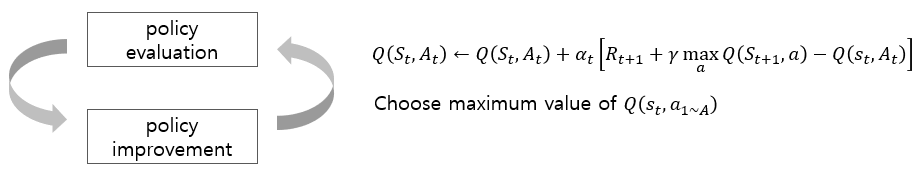

In [ ]:
def Qlearning():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(10000):  # 총 1,000 에피소드 동안 학습
        done = False
        history = []

        s = env.reset()

        while not done:  # 한 에피소드가 끝날 때 까지
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            agent.update_table_qlearning((s,a,r,s_prime))  # 히스토리를 이용하여 에이전트를 업데이트
            s = s_prime
        agent.anneal_eps()

    agent.print_rands()
    agent.show_table()  # 학습이 끝난 결과를 출력
    agent.show_table2()  # 학습이 끝난 결과를 출력


# Main

In [ ]:
if __name__ == '__main__':
    #mc()
    #sarsa()
    Qlearning()